In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

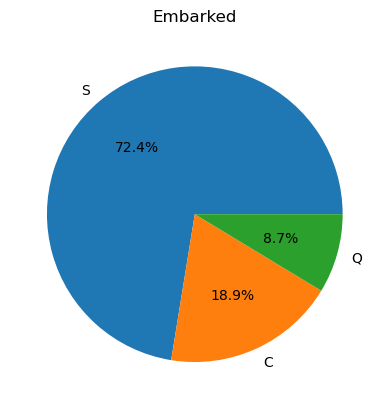

In [21]:
plt.pie(df['Embarked'].value_counts(),labels=df['Embarked'].value_counts().index,autopct='%1.1f%%')
plt.title('Embarked')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,2
4,0,3,male,35.0,0,0,8.0500,2


In [25]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [27]:
pd.DataFrame(df.groupby(['Sex','Survived'])['Survived'].count())

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [29]:
df.Sex=df.Sex.map({'male':0,'female':1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [31]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

<Axes: >

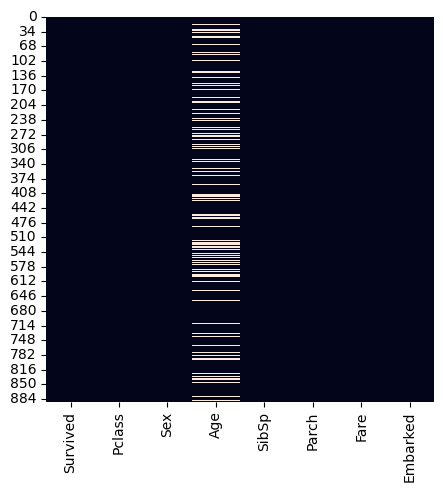

In [33]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),cbar=False)

In [35]:
cols=df.columns
cols

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [41]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=5)
df=knn.fit_transform(df)
df=pd.DataFrame(df,columns=cols)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,0.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,1.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,1.0,35.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,0.0,35.0,0.0,0.0,8.0500,2.0


In [43]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [45]:
df.Pclass.value_counts()

Pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64

<Axes: >

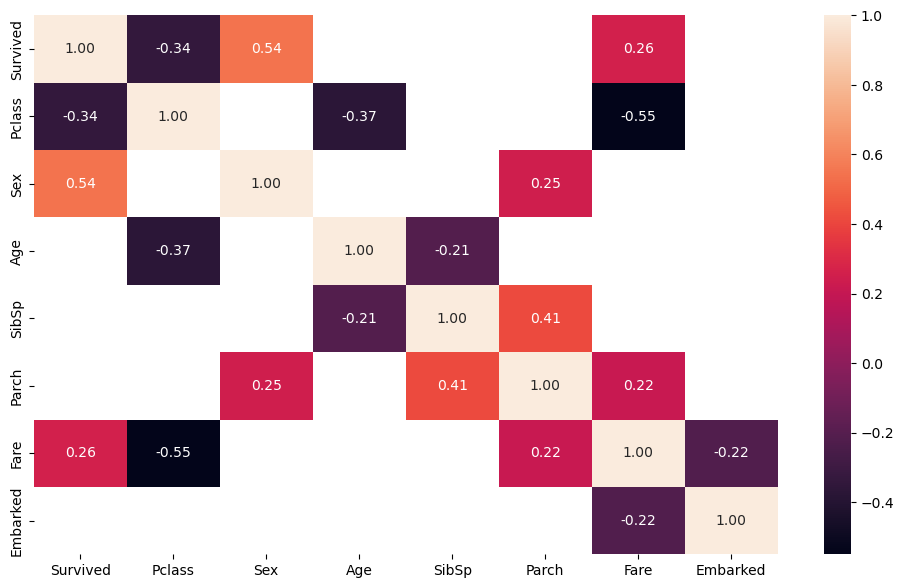

In [47]:
plt.figure(figsize=(12,7))
corr=df.corr()
sns.heatmap(corr,mask=corr.abs()<0.2,annot=True,fmt='.2f')

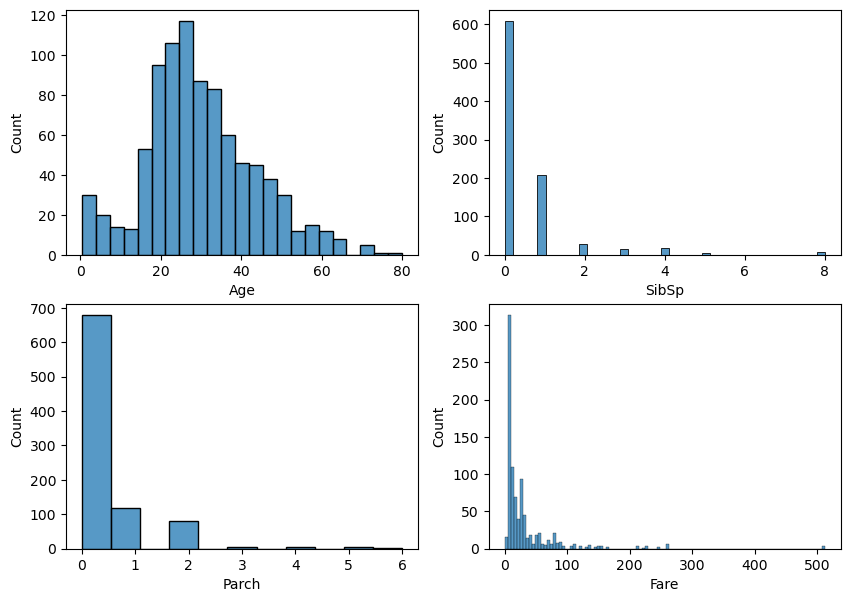

In [49]:
col=['Age','SibSp','Parch','Fare']

plt.figure(figsize=(10,7))
for i,j in enumerate(col):
    plt.subplot(2,2,i+1)
    sns.histplot(df[j])
plt.show()

In [51]:
df[['Age','Fare']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.936200,13.670282,0.42,21.0000,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [53]:
#Handle outlier df[Fare]
df=df[df['Fare']<300]
df.shape

(888, 8)

In [55]:
df.Age=pd.qcut(df.Age, 8, labels=False)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,0.0,2,1.0,0.0,7.2500,2.0
1,1.0,1.0,1.0,5,1.0,0.0,71.2833,0.0
2,1.0,3.0,1.0,3,0.0,0.0,7.9250,2.0
3,1.0,1.0,1.0,5,1.0,0.0,53.1000,2.0
4,0.0,3.0,0.0,5,0.0,0.0,8.0500,2.0


In [57]:
df.Age.value_counts()

Age
2    129
5    118
0    113
1    112
4    109
6    107
7    106
3     94
Name: count, dtype: int64

In [59]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [61]:
df.Sex.unique()

array([0., 1.])

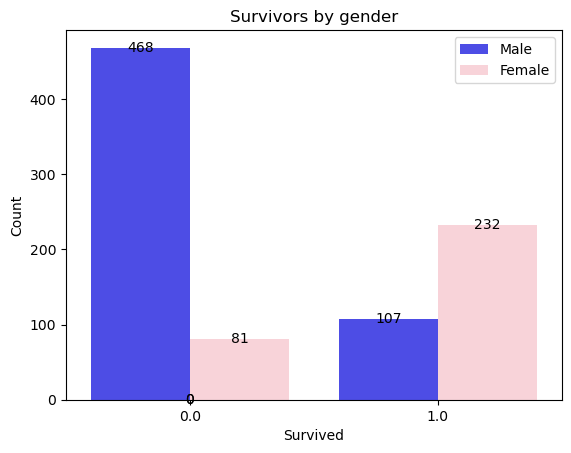

In [63]:
sns.countplot(x='Survived', data=df, palette=['blue','pink'],hue='Sex',alpha=.8)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survivors by gender')
plt.legend(['Male','Female'])
plt.show()

In [65]:
df.Survived.unique()

array([0., 1.])

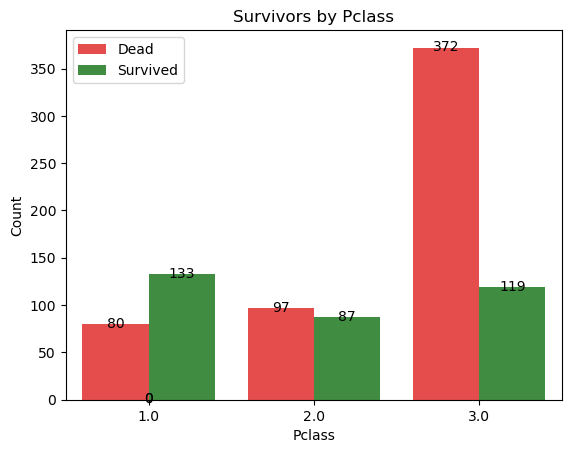

In [67]:
sns.countplot(x='Pclass', data=df,hue='Survived',palette=['r','g'],alpha=.8)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survivors by Pclass')
plt.legend(['Dead','Survived'])
plt.show()

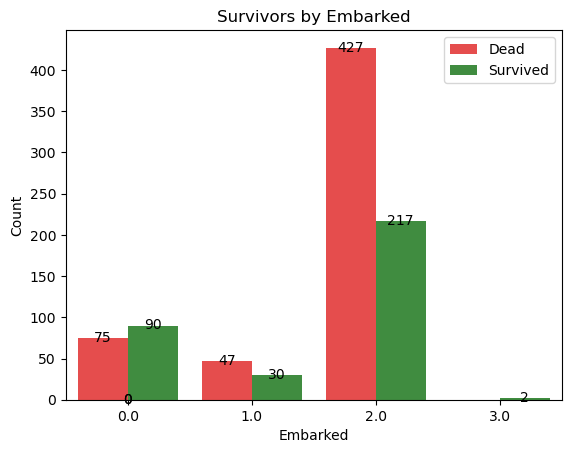

In [69]:
sns.countplot(x='Embarked', data=df,hue='Survived',palette=['r','g'],alpha=.8)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survivors by Embarked')
plt.legend(['Dead','Survived'])
plt.show()

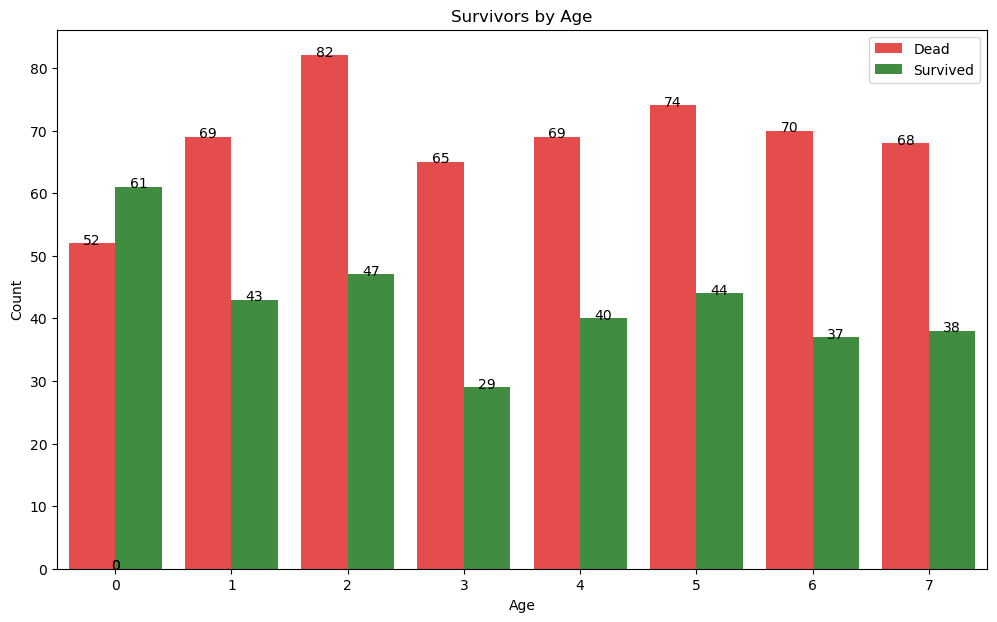

In [71]:
plt.figure(figsize=(12,7))
sns.countplot(x='Age', data=df,hue='Survived',palette=['r','g'],alpha=.8)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Survivors by Age')
plt.legend(['Dead','Survived'])
plt.show()

In [73]:
#num of survived by Age
df[df.Survived==1].Age.value_counts()

Age
0    61
2    47
5    44
1    43
4    40
7    38
6    37
3    29
Name: count, dtype: int64

In [81]:
#num of Deed by Age
df[df.Survived==0].Age.value_counts()

Age
2    82
5    74
6    70
1    69
4    69
7    68
3    65
0    52
Name: count, dtype: int64

In [85]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 182.2 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [87]:
import xgboost

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [95]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [93]:
y.value_counts()#unbalance

Survived
0.0    549
1.0    339
Name: count, dtype: int64

In [97]:
# hundel unbalance data
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x,y)
print(Counter(y_res))
x_res.shape,y_res.shape

Counter({0.0: 549, 1.0: 549})


((1098, 7), (1098,))

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [101]:
Accuracy_models=[]
Name_models=[]

In [103]:
def check_overfitting(model,x_train,x_val,x_test):
    y_train_pred=model.predict(x_train)
    y_val_pred=model.predict(x_val)
    y_test_pred=model.predict(x_test)

    Train_accuracy = accuracy_score(y_train,y_train_pred)
    Validaion_accuracy = accuracy_score(y_val,y_val_pred)
    Test_accuracy = accuracy_score(y_test,y_test_pred)

    print(f"-Train accuracy: {Train_accuracy*100:.2f}%")
    print(f"-Validation accuracy: {Validaion_accuracy*100:.2f}%")
    print(f"-Test accuracy: {Test_accuracy*100:.2f}%")


    print(f'-F1_Score: {f1_score(y_test,y_test_pred)*100:.2f}%')
    print(f'-Precision: {precision_score(y_test,y_test_pred)*100:.2f}%')
    print(f'-Recall: {recall_score(y_test,y_test_pred)*100:.2f}%\n\n')

    sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='d')
    plt.show()

    if abs(Validaion_accuracy - Train_accuracy)*100 > 5:
        print(f"-Overfitting with diff: {abs(Validaion_accuracy - Train_accuracy)*100:.2f}%\n")
        print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
    else:
        print(f"-Not Overfitting & Test accuracy: {Test_accuracy*100:.2f}%\n\n")

    Accuracy_models.append(Test_accuracy)

In [105]:
decision_tree=DecisionTreeClassifier(random_state=42)
params={'criterion':['gini','entropy'], 'max_depth':[4,5,8,10],'ccp_alpha':[.01,.02,.03]}
grid=GridSearchCV(estimator=decision_tree,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy')
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.01, 0.02, 0.03],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 8, 10]},
             scoring='accuracy')

In [107]:
grid.best_params_

{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 8}

In [109]:
finall_decision_tree=grid.best_estimator_

-Train accuracy: 82.48%
-Validation accuracy: 84.09%
-Test accuracy: 82.27%
-F1_Score: 82.03%
-Precision: 82.41%
-Recall: 81.65%




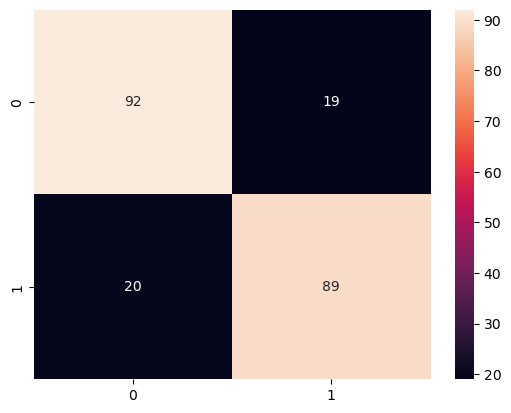

-Not Overfitting & Test accuracy: 82.27%




In [111]:
check_overfitting(finall_decision_tree,x_train,x_val,x_test)

In [113]:
Name_models.append('Decision Tree')

In [115]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_val=sc.transform(x_val)
x_test=sc.transform(x_test)

In [117]:
GNB=GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid=GridSearchCV(estimator=GNB,
                  param_grid=param_grid,
                  cv=5,
                  scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [119]:
finall_GNB=grid.best_estimator_
grid.best_params_

{'var_smoothing': 1e-09}

-Train accuracy: 75.50%
-Validation accuracy: 72.16%
-Test accuracy: 80.45%
-F1_Score: 81.55%
-Precision: 76.61%
-Recall: 87.16%




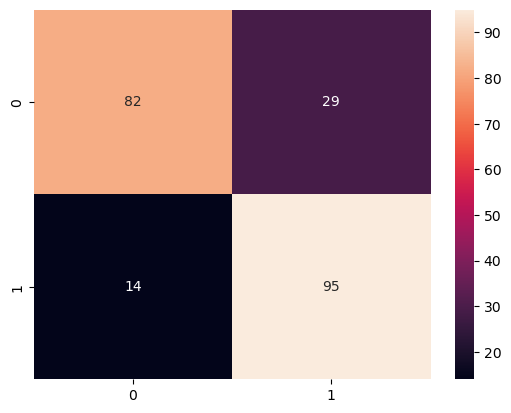

-Not Overfitting & Test accuracy: 80.45%




In [121]:
check_overfitting(finall_GNB,x_train,x_val,x_test)

In [123]:
Name_models.append('Gaussian NB')

In [125]:
lr=LogisticRegression()
params={'multi_class':['ovr','auto'],'C':[0.1,1,10,100],'penalty':['l1','l2']}
grid=GridSearchCV(estimator=lr,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'multi_class': ['ovr', 'auto'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [127]:
finall_lr=grid.best_estimator_
grid.best_params_

{'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l2'}

-Train accuracy: 77.49%
-Validation accuracy: 75.57%
-Test accuracy: 80.45%
-F1_Score: 81.06%
-Precision: 77.97%
-Recall: 84.40%




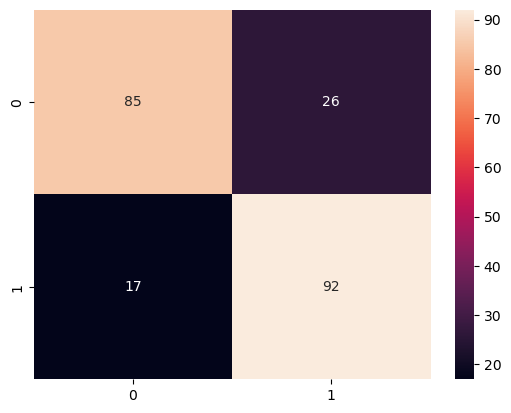

-Not Overfitting & Test accuracy: 80.45%




In [129]:
check_overfitting(finall_lr,x_train,x_val,x_test)

In [131]:
Name_models.append('Logistic Regression')

In [ ]:
svc=SVC()
params={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['linear','rbf','poly']}
grid=GridSearchCV(estimator=svc,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy')
grid.fit(x_train,y_train)

In [ ]:
finall_svc=grid.best_estimator_
grid.best_params_

In [ ]:
check_overfitting(finall_svc,x_train,x_val,x_test)

In [ ]:
Name_models.append('SVC')

In [ ]:
# High-dimensional data can lead to overfitting in KNN because it can make the distances between data points less meaningful. Dimensionality reduction techniques can help:

# PCA (Principal Component Analysis): Use PCA to reduce the dimensionality of the feature space and remove noise.
# LDA (Linear Discriminant Analysis): Use LDA if you have labeled data and want to reduce dimensions while maximizing class separability.

from sklearn.decomposition import PCA
pca=PCA(n_components=6)
x_train_pca=pca.fit_transform(x_train)
x_val_pca=pca.transform(x_val)
x_test_pca=pca.transform(x_test)
#diff: 18  become: 16

In [ ]:
knn=KNeighborsClassifier()

params={'n_neighbors':[1,3,5,7,9,11,13,15,17],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
grid=GridSearchCV(estimator=knn,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy')
grid.fit(x_train_pca,y_train)

In [ ]:
finall_knn=grid.best_estimator_
grid.best_params_

In [ ]:
check_overfitting(finall_knn,x_train_pca,x_val_pca,x_test_pca)

In [ ]:
Name_models.append('KNN')

In [ ]:
random_forest=RandomForestClassifier(random_state=42)
params={'n_estimators':[10,50,100,150,200],'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
grid=GridSearchCV(estimator=random_forest,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy')
grid.fit(x_train,y_train)

In [ ]:
finall_random_forest=grid.best_estimator_
grid.best_params_

In [ ]:
check_overfitting(finall_random_forest,x_train,x_val,x_test)

In [ ]:
Name_models.append('Random Forest')

In [ ]:
xgboost=XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.01, random_state=42)
xgboost.fit(x_train,y_train)

In [ ]:
check_overfitting(xgboost,x_train,x_val,x_test)

In [ ]:
Name_models.append('XGBoost')

In [ ]:
adaboost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                            n_estimators=200,
                            learning_rate=0.5,
                            random_state=42)
adaboost.fit(x_train,y_train)

In [ ]:
check_overfitting(adaboost,x_train,x_val,x_test)

In [ ]:
Name_models.append('AdaBoost')

In [ ]:
gradient_boosting=GradientBoostingClassifier(n_estimators=200,
                                            learning_rate=0.01,
                                            max_depth=4,
                                            random_state=42)
gradient_boosting.fit(x_train,y_train)

In [ ]:
check_overfitting(gradient_boosting,x_train,x_val,x_test)

In [ ]:
Name_models.append('Gradient Boosting')

In [ ]:
base_models = [('rf',RandomForestClassifier(max_depth= 4, n_estimators= 40)),
               ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=4, random_state=42))]

meta_model = LogisticRegression()
stacking = StackingClassifier(estimators=base_models,
                              final_estimator=meta_model
                              )
stacking.fit(x_train, y_train)

In [ ]:
check_overfitting(stacking,x_train,x_val,x_test)

In [ ]:
Name_models.append('Stacking')

In [ ]:
model_accuracy=pd.DataFrame({'Model':Name_models,'Accuracy':Accuracy_models})
model_accuracy.sort_values(by='Accuracy',ascending=False,inplace=True)
model_accuracy.reset_index(drop=True,inplace=True)
model_accuracy

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=model_accuracy['Model'],y=model_accuracy['Accuracy'],palette='rocket')

for i, v in enumerate(model_accuracy['Accuracy']):
    plt.text(i, v + 0.01, f"{v*100:.1f}%", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel('Models Name')
plt.ylabel('Accuracy')
plt.title('Accuracy of different models')
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['Accuracy']*100,marker='o',color='r',lw=2)

plt.xticks(rotation=45)
plt.xlabel('Models Name')
plt.ylabel('Accuracy')
plt.title('Accuracy of different models')
plt.show()